# Titanic - Machine Learning from Disaster 
**Started 03/31/22**

As I wrote in a Medium.com blog post, the first Data Science assignment I grasped and enjoyed was the EDA for the dataset for the Titanic. As we approach the anniversary of the Titanic a favorite YouTuber of mine, Max Miller, has begun to explore dining abroad the Titanic and the meals one may have enjoyed as a first-, second-, or third-class passenger. His recently exploration of the topic motivated me to re-visit the Titanic dataset, taking the step to formalize things and make a Kaggle submission.

Kaggle Overview: https://www.kaggle.com/competitions/titanic/overview

**Imports**

In [1]:
import pandas as pd
import numpy as np
import missingno

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading in data
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
print(f'The train dataframe is {train.shape}')
print(f'The test dataframe is {test.shape}')

The train dataframe is (891, 12)
The test dataframe is (418, 11)


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Data Cleaning**

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


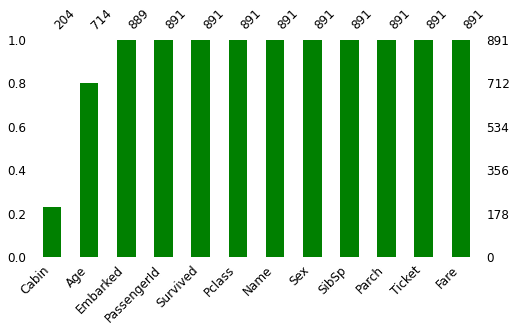

In [7]:
missingno.bar(train, figsize = (8, 4), fontsize = 12, color = 'green', sort = 'ascending');

In [8]:
train.isna().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

In [9]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


- According to records I was able to find about the two above passengers (a lady and her maid), both boarded in Southampton, check it out [here](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html). I am going to fill the null values with 'S' as appropriate.

In [10]:
train['Embarked'].fillna(value = 'S', inplace = True)

- To address the 'Age' null values, I'm going to fill the nulls with the mean age. This isn't the best way to clean the data, but it's easy.

In [11]:
round(train['Age'].mean(), 2)

29.7

In [12]:
train['Age'].fillna(value = 29.70, inplace = True)

In [13]:
len(train[train['Cabin'].isna()]) / train.shape[0]

0.7710437710437711

- The last feature with null values to address is 'Cabin'. Over 77% of the values of the feature are null therefore it wouldn't be too useful for modeling. I don't need to address these null values. 

**Exploring Features**

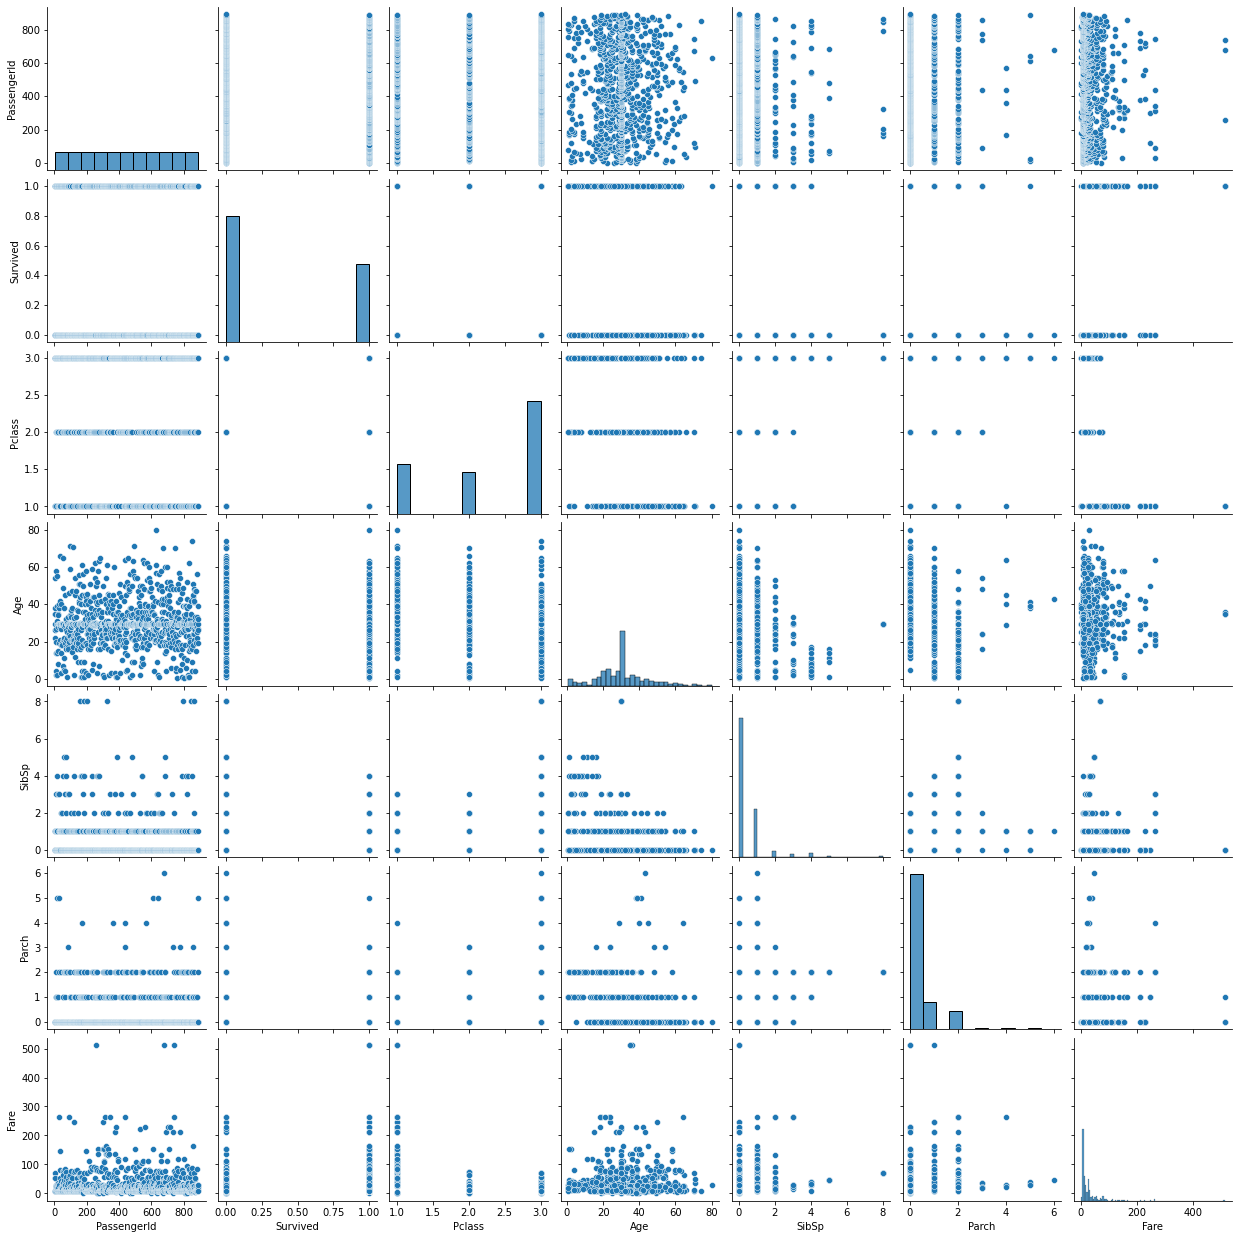

In [14]:
sns.pairplot(train);

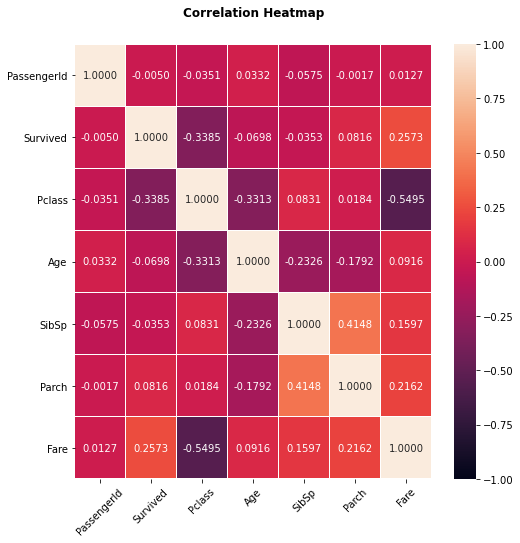

In [15]:
plt.figure(figsize = (8, 8))

plt.title('Correlation Heatmap',
          fontsize = 12,
          fontweight = 'bold',
          y = 1.05)

sns.heatmap(data = train.corr(),
            vmin = -1,
            vmax = 1,
            annot = True,
            fmt = '.4f',
            linewidths = 0.1)

plt.xticks(rotation = 45)

plt.yticks(rotation = 0);

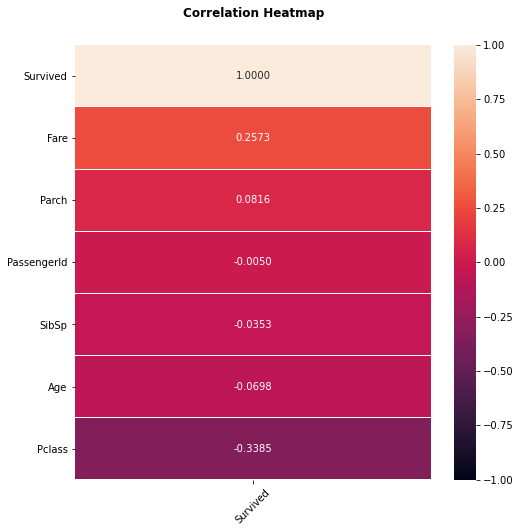

In [19]:
plt.figure(figsize = (8, 8))

plt.title('Correlation Heatmap',
          fontsize = 12,
          fontweight = 'bold',
          y = 1.05)

sns.heatmap(data = train.corr()[['Survived']].sort_values(by = 'Survived',
                                                          ascending = False),
            vmin = -1,
            vmax = 1,
            annot = True,
            fmt = '.4f',
            linewidths = 0.1)

plt.xticks(rotation = 45)

plt.yticks(rotation = 0);

In [21]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
train['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

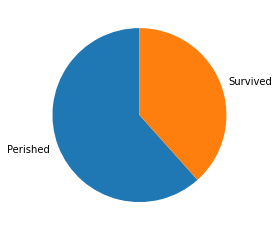

In [34]:
plt.pie(x = train['Survived'].value_counts(normalize = True),
        labels = ['Perished', 'Survived'],
        startangle = 90);

- Only 38.38% of the passengers in the training data survived.

In [37]:
train['Pclass'].value_counts(normalize = True).sort_index()

1    0.242424
2    0.206510
3    0.551066
Name: Pclass, dtype: float64

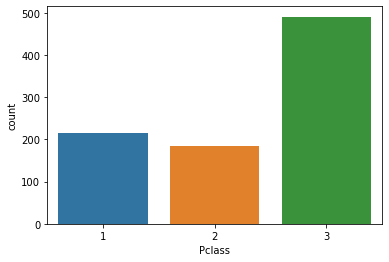

In [46]:
sns.countplot(x = 'Pclass', data = train);

**Data Preparation**

In [ ]:
#for modeling
# X_train = train_df.drop("Survived", axis=1)
# Y_train = train_df["Survived"]
# X_test  = test_df.copy()